# Priors and Updates

Get two distributions needed to figure out how to do updates given game results:
- Distribution of career VPPs
- Distribution of game VPPs
  - Given the player's career average (use that as the mean)
  - Allow the standard deviation to be a function of # of possessions

Inspired by slide 10 on [this show](https://math.mit.edu/~dav/05.dir/class15-slides-all.pdf)

You can run `python cli.py fit-params <values.csv path>` to get this without the debug plots 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from individual_players import fit_params

plt.style.use('ggplot')

In [3]:
params, career_averages, values_df, fit_result = fit_params('data/ncaawbb_values.csv')

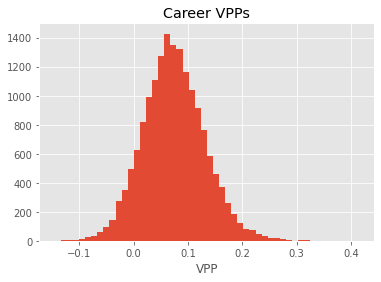

In [4]:
plt.hist(career_averages.vpp, bins=50);
career_averages.vpp.mean(), career_averages.vpp.std()
plt.title('Career VPPs')
plt.xlabel('VPP');

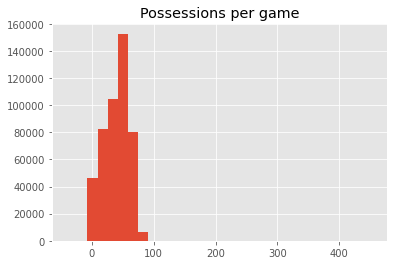

In [5]:
# Used to figure out the bins for possession STD
plt.hist(values_df[np.isfinite(values_df.possessions)].possessions, bins=30)
plt.title("Possessions per game");

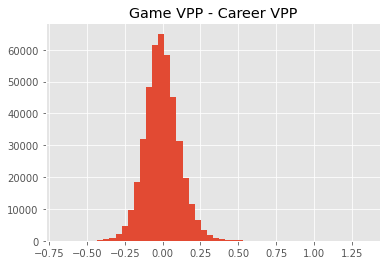

In [6]:
# Proof that game vpp ~ N(career vpp, sd)
game_vs_career = values_df.vpp - values_df.vpp_career
game_vs_career = game_vs_career[values_df.possessions > 10]
game_vs_career = game_vs_career[np.isfinite(game_vs_career)]

plt.hist(game_vs_career, bins=50)
plt.title("Game VPP - Career VPP");

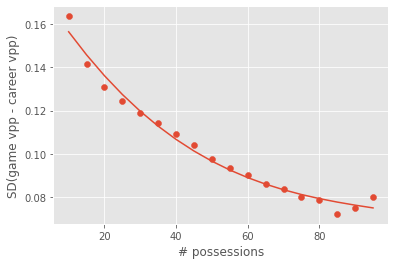

In [7]:
# Check that the LM of std ~ possessions is reasonable
plt.scatter(fit_result.x, fit_result.y);
plt.plot(fit_result.x, fit_result.y_hat)
plt.xlabel("# possessions")
plt.ylabel("SD(game vpp - career vpp)");

In [8]:
params

UpdateParams(career_mean=0.0740900862700245, career_std=0.05733461912715384, possession_std_coefficients=[0.18104323610404763, -0.0026996001481427046, 2.4167153339840358e-05, -7.891419777117007e-08])